## Dataset Cleaning
1. Emojis ? removing or replacing with word of emotion ?
2. Puntuation ? what to remove what to keep ?
3. stop words ?

## Dataset preprocessing
1. Tokenizing
2. stemming  - Todo
3. POS tags  - todo
4. NER   -todo - Ananya NER dataset -check research

In [37]:

from __future__ import unicode_literals
# set matplotlib font to visualize sinhala font in plots
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = 'C:/Users/Kavishka/anaconda3/Library/share/fonts/Nirmala.ttf'
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()

## Issues 

In [141]:
unicodeData= {
    "string1": "ක්‍රි   යාත්මක",
    "string2": u"\u200d"
}
print("unicode Data is ", unicodeData)

unicode Data is  {'string1': 'ක්\u200dරි   යාත්මක', 'string2': '\u200d'}


In [11]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('../Datasets/gossipsite_dataset/gossip_dataset_complete_v0.csv',header =None, encoding='utf-8')
df.columns = ['comment','label']
df.head(n=20)

,comment,label
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1
1,තූ ෙනදකින්,1
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හ...,0
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා...,0
4,පූදින්ෙන නැතුව ඉදිං,1
5,ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් ද...,1
6,මා හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසි...,0
7,උඹ එක්ක එකඟවෙන්න පුලුවන් කථාවක් තමයි අද බොලා ක...,1
8,කොළඹ යුගයේදී කියලා වෙන්න ඇති මගේ හිතේ කියන්න ඇ...,0
9,කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා ම...,0


In [12]:
len(df)

6468

In [10]:
# Null values
count = df.isna().sum()
precentange = df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
0,0,0.0
1,0,0.0


In [3]:
# duplications
df.duplicated('comment').sum()

187

In [12]:
df[df.duplicated('comment')]

,comment,label
22,ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ දැක්කාම. ඔබලාගේ ම...,0
53,ඉතිහාසය ඉදිරියේ මෙවැනි හෙළිදරවුවක් කිරීමට අවකා...,0
247,දෙමළ සන්ධානය එජාපයට හේත්තු වූ හේතුව ධර්මලිංගම්...,0
347,සිංහල - ශ්‍රී ලංකාවේ දේශපාලන අර්බුදය: ජනපති මෛ...,0
353,මේක ලෝකෙට කියන්නත් හදුන්වන්න ඕනේ,0
...,...,...
6244,මූ මීට කලින් මාධ්‍යවල කථාකරපු අපේ කිරීඩකයෝ ඔක්...,1
6317,දැන් අපේ අම්මා පොල් බිඳින්නෙත්,0
6424,ඔයා තවම පුංචි වැඩියි...ලෝකය ගැන තවම තේරුමක් නෑ.,0
6429,අද කාලේ ගෑනුන්ට තියෙන විසේ තරම දන්න නිසයි කොල්...,0


## Class distribution

In [14]:
df.groupby(['label'])['label'].describe()[['count']]

,count
label,
0,4456.0
1,2012.0


0    68.893012
1    31.106988
Name: label, dtype: float64

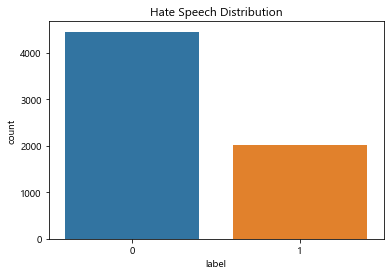

In [16]:
sns.countplot(x='label', data=df).set_title('Hate Speech Distribution')
df['label'].value_counts(normalize=True) * 100
# uneven datset ?
# evalaution metrics ?
# upsampling
# weigted classes ??

Heavy class imbalance. Need to check posibility of combining other datasets or use weighted classes when evaluating models

Data Augmentation for hate (1) class ?

## comments length

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001463D49C4C8>,
      dtype=object)

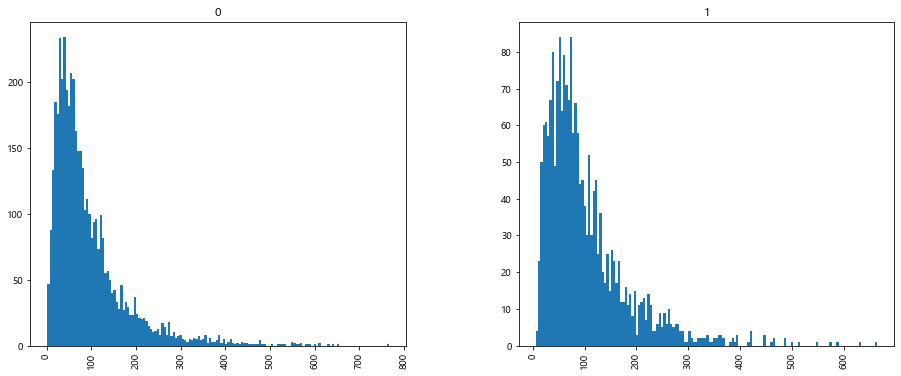

In [17]:
df['length'] = df['comment'].apply(len)
df.hist(column='length',by=df['label'],figsize=(15,6), bins=150)

# Most comment has 0 to 200 length

Hate class (1) comments length is largly less than non hate class comments length

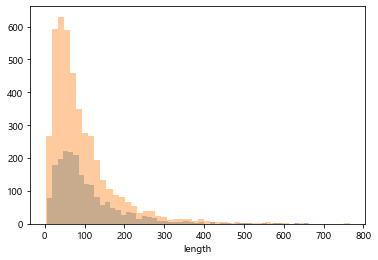

In [19]:

hate = df.loc[df['label']==1,'length']
non_hate = df.loc[df['label']==0,'length']
 
fig, ax = plt.subplots()
 
for i in [hate,non_hate]:
    sns.distplot(i, ax=ax, kde=False)
     

There is clearly two different distributions of length in two classes

In [21]:
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df['comment'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["comment"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

,comment,label,length,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?,1,41,7,35,1,5.000000,7.0
1,තූ ෙනදකින්,1,10,2,9,1,4.500000,2.0
2,අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හ...,0,168,30,139,5,4.633333,6.0
3,දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා...,0,105,15,91,3,6.066667,5.0
4,පූදින්ෙන නැතුව ඉදිං,1,19,3,17,1,5.666667,3.0


In [22]:
# duplications
df.duplicated().sum()

177

In [25]:
def check_correlation_of_text_length(x,y):
    fig,ax = plt.subplots(nrows=1,ncols=2)
    fig.suptitle(x,fontsize=12)
    for i in df[y].unique():
        sns.distplot(df[df[y]==i][x], hist=True, kde=False, bins=10, hist_kws={"alpha":0.8}, axlabel="histogram", ax=ax[0])
        sns.distplot(df[df[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="density",ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(df[y].unique())
    ax[1].grid(True)
    plt.show()

In [27]:

df.columns[2:]

Index(['length', 'word_count', 'char_count', 'sentence_count',
       'avg_word_length', 'avg_sentence_lenght'],
      dtype='object')

length


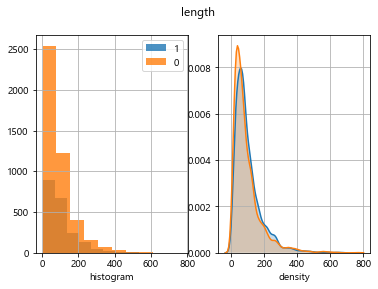

word_count


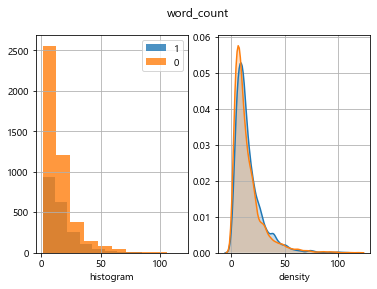

char_count


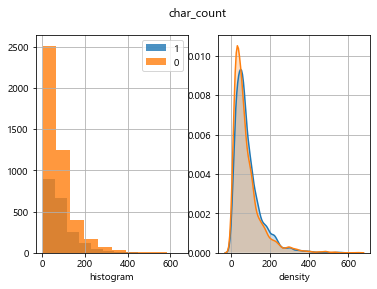

sentence_count


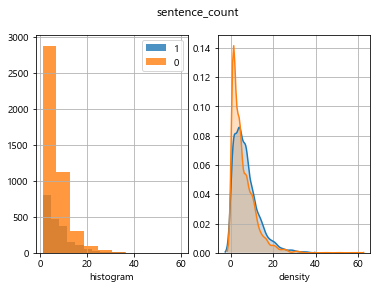

avg_word_length


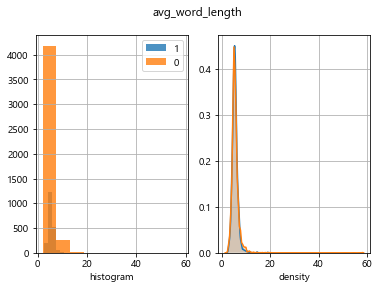

avg_sentence_lenght


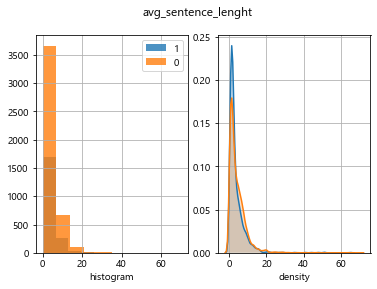

In [28]:
y = 'label'
for col in df.columns[2:]:
    print(col)
    check_correlation_of_text_length(col,y)

## Most common words

In [30]:
from collections import Counter

#plt.rc('font', family='Lohit Devanagari')

results = Counter()
df['comment'].str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('මේ', 1024), ('වගේ', 810), ('එක', 683), ('නම්', 536), ('කියලා', 514), ('දැන්', 509), ('ඒ', 449), ('නෑ', 448), ('තමයි', 427), ('මම', 367)]


## Most common words in hate label

In [32]:
words = [word for i in df[df['label'] == 1]['comment'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('වගේ', 445),
 ('මේ', 382),
 ('එක', 261),
 ('කියලා', 202),
 ('නම්', 191),
 ('තමයි', 168),
 ('නැති', 168),
 ('අනේ', 156),
 ('නෑ', 147),
 ('දැන්', 141),
 ('ඔය', 130),
 ('උඹ', 128),
 ('ඉන්න', 120),
 ('පල', 116),
 ('?', 113),
 ('ලොකු', 112),
 ('ඒ', 112),
 ('මෝඩ', 105),
 ('මම', 100),
 ('උන්', 98)]

## Most common word in non hate class

In [33]:
words = [word for i in df[df['label'] == 0]['comment'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('මේ', 642),
 ('එක', 422),
 ('දැන්', 368),
 ('වගේ', 365),
 ('නම්', 345),
 ('ඒ', 337),
 ('කියලා', 312),
 ('නෑ', 301),
 ('මම', 267),
 ('තමයි', 259),
 ('කරන්න', 233),
 ('එකක්', 213),
 ('හරි', 209),
 ('ඔය', 203),
 ('අපේ', 201),
 ('ඉන්න', 198),
 ('නෑ.', 194),
 ('ගැන', 185),
 ('නැති', 179),
 ('වෙලා', 176)]

## Plot stop words

In [ ]:
# corpus=[]
# new= news['headline_text'].str.split()
# new=new.values.tolist()
# corpus=[word for i in new for word in i]

# from collections import defaultdict
# dic=defaultdict(int)
# for word in corpus:
#     if word in stop:
#         dic[word]+=1

## Plot most common words other that stop words 

In [ ]:
# counter=Counter(corpus)
# most=counter.most_common()

# x, y= [], []
# for word,count in most[:40]:
#     if (word not in stop):
#         x.append(word)
#         y.append(count)
        
# sns.barplot(x=y,y=x)

## show world cloud

In [ ]:
# from wordcloud import WordCloud
# stopwords = set(STOPWORDS)

# def show_wordcloud(data):
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=stopwords,
#         max_words=100,
#         max_font_size=30,
#         scale=3,
#         random_state=1)
   
#     wordcloud=wordcloud.generate(str(data))

#     fig = plt.figure(1, figsize=(12, 12))
#     plt.axis('off')

#     plt.imshow(wordcloud)
#     plt.show()

# show_wordcloud(corpus)

## Cleaning

In [34]:
# Symbols except question mark and !
exclude = set(",.:;'\"-/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])

# removing digits    
def removeNumber(txt):
    return ''.join(c for c in txt if not c.isnumeric())

# Remove emojis
import emoji
def removeEmoji(txt):
    return emoji.get_emoji_regexp().sub(u'', txt)
df['cleaned'] = df['comment'].apply(lambda x: removePunctuation(x))
print(df['cleaned'].head(n=15))
df['cleaned'] = df['cleaned'].apply(lambda x: removeNumber(x))
print(df['cleaned'].head(n=15))
df['cleaned'] = df['cleaned'].apply(lambda x: removeEmoji(x))
print(df['cleaned'].head(n=15))


0             මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?
1                                            තූ ෙනදකින්
2     අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා  හ...
3     දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා...
4                                   පූදින්ෙන නැතුව ඉදිං
5     ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් ද...
6     මා හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසි...
7     උඹ එක්ක එකඟවෙන්න පුලුවන් කථාවක් තමයි අද බොලා ක...
8     කොළඹ යුගයේදී කියලා වෙන්න ඇති මගේ හිතේ කියන්න ඇ...
9     කිමද මේ තරම් කොහේදෝ ඇති විදපු ගලක් හා උරන මා ම...
10    අපි බෞද්ධයෝ විදිහට ස්භාව දහමටත් මනුෂ්‍යත්වයටත්...
11    එකට බුදියගෙන ළමයි හැදුවට පස්සෙ මොන මගුලද බං  ම...
12    ගොසිප්පෝ මේවගේ අවයව වෙන්වීමකදී ගතයුතු ක්‍රියාම...
13           එහෙම කොහොමද උනේ 😂😂 පරය අපිව අයින් කරල නේ 😂
14    ඉතිං අපිට අඩන්නද බොල කියන්නෙ   මූ හෙන මෝඩ චූන්...
Name: cleaned, dtype: object
0             මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?
1                                            තූ ෙනදකින්
2     අම්මා ලුසීඩා 

## N-Grams Distribution

# Unigram


In [97]:
from nltk import bigrams,trigrams
unigrams =[s.split(' ') for s in df['cleaned']]
print(unigrams[:20])

[['මේ', 'වේසිට', 'නීතිය', 'ක්\u200dරියාත්මක', 'වෙන්නෙ', 'කවදාද', '?'], ['තූ', 'ෙනදකින්'], ['අම්මා', 'ලුසීඩා', 'කියුවම', 'මට', 'හිතෙන්නම', 'ෆලූඩා', 'කියලා', '', 'හිකිස්', '', 'ඔව්', 'ඔව්', 'තරුණ', 'වයසේ', 'ගෑණු', 'ළමයි', 'විවිඪ', 'රට', 'වලින්', 'ආශ්\u200dරය', 'කලාට', 'කමක්', 'නෑ', '', 'ලෙඩක්', 'කාරියේ', 'හදා', 'ගත්තම', 'තේරෙයි', 'අප්පගේ', 'ආදර', 'බර', 'පුතාට\u200b', ''], ['දින', 'ඒකාබද්ධ', 'විපක්ෂයේ', 'මාධ්\u200dය', 'ලේකම්', 'රේණුක', 'පෙරේරා', 'මහතාගේ', 'නිවේදනයට', 'අදාාලව', 'අමිත්', 'වීරසිංහ', 'කල', 'මාධ්\u200dය', 'සාකච්ඡාව', '', '…'], ['පූදින්ෙන', 'නැතුව', 'ඉදිං'], ['ඇමති', 'පඩිය', 'ඇතිද', 'කියල', 'අහුවම', 'මේකි', 'කියන්නේ', 'වාහන්', 'දෙකයි', 'එයාට', 'තියෙන්නේ', 'කියලා', '', 'එතකොට', 'අප්පටයි'], ['මා', 'හෝ', 'ඒකාබද්ධ', 'විපක්ෂය', 'මගින්', 'හෝ', 'දැනට', 'පවතින', 'කිසිම', 'පක්ෂයකින්', 'ඡන්දයකට', 'ඉදිරිපත්', 'වෙනවා', 'කියා', 'නැ', '', '', 'ඒකාබද්ධ', 'විපක්ෂය', 'වැනි', 'වි…'], ['උඹ', 'එක්ක', 'එකඟවෙන්න', 'පුලුවන්', 'කථාවක්', 'තමයි', 'අද', 'බොලා', 'කියලා', 'තියෙන්නෙ', '', '', 'මුන්ගෙ', 'සනු

In [111]:
import re
  
# initializing string
test_str = 'ක්‍රියාත්මක'
  
# printing original String
print("The original string is : " + str(test_str))
print(test_str)
# using sub() to perform substitutions
# ord() for conversion.
res = (re.sub('.', lambda x: r'\u % 04X' % ord(x.group()), test_str))
  
# printing result 
print("The unicode converted String : " + str(res)) 

The original string is : ක්‍රියාත්මක
ක්‍රියාත්මක
The unicode converted String : \u  D9A\u  DCA\u  200D\u  DBB\u  DD2\u  DBA\u  DCF\u  DAD\u  DCA\u  DB8\u  D9A


In [100]:
from sinling import SinhalaTokenizer, preprocess
tokenizer = SinhalaTokenizer()
tokenized_lines = []
for line in df['cleaned']:
    tokens = tokenizer.tokenize(preprocess(line))
    tokenized_lines.append(tokens)
print(tokenized_lines[:5])



[['මේ', 'වේසිට', 'නීතිය', 'ක්\u200dරියාත්මක', 'වෙන්නෙ', 'කවදාද', '?'], ['තූ', 'ෙනදකින්'], ['අම්මා', 'ලුසීඩා', 'කියුවම', 'මට', 'හිතෙන්නම', 'ෆලූඩා', 'කියලා', 'හිකිස්', 'ඔව්', 'ඔව්', 'තරුණ', 'වයසේ', 'ගෑණු', 'ළමයි', 'විවිඪ', 'රට', 'වලින්', 'ආශ්\u200dරය', 'කලාට', 'කමක්', 'නෑ', 'ලෙඩක්', 'කාරියේ', 'හදා', 'ගත්තම', 'තේරෙයි', 'අප්පගේ', 'ආදර', 'බර', 'පුතාට'], ['දින', 'ඒකාබද්ධ', 'විපක්ෂයේ', 'මාධ්\u200dය', 'ලේකම්', 'රේණුක', 'පෙරේරා', 'මහතාගේ', 'නිවේදනයට', 'අදාාලව', 'අමිත්', 'වීරසිංහ', 'කල', 'මාධ්\u200dය', 'සාකච්ඡාව'], ['පූදින්ෙන', 'නැතුව', 'ඉදිං']]


C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
['!', '!!', '!!!', '!!!!', '!!!!!', '!!!!!!!', '!!!!!!!!', '!!!!!!!!!!!', '!!!!!!!!!!!!!!!', '#', '#+චණ්ඩි', '#අපිහැමෝමසැපේඉන්නෙතිතටමත', '#ආතල්මල්ලි', '#ජොබ්එකගාවගමු', '#තනියමකියවයි', '#දැකලා_හිතුණා', '#දැවෙනප්\u200dරශ්න', '#දෙකටනැවිලාතියාගනිංපුකටපුක', '#නොදකිං', '#පට්ටෟත්ති', '#පුකපෙන්නීම', '#බොබී', '#මගේනම්මගේ', '#මාතර_අහස_උඩ', '#මුංඔක්කොමහිතංඉන්නේමතටතිත', '#මේවාසිරාසිද්ධි', '#යි', '#රටේනීතියගැනආඩම්බරයි', '#රෑනවයටසිත්ගත්ගී', '#රෙද්ද']


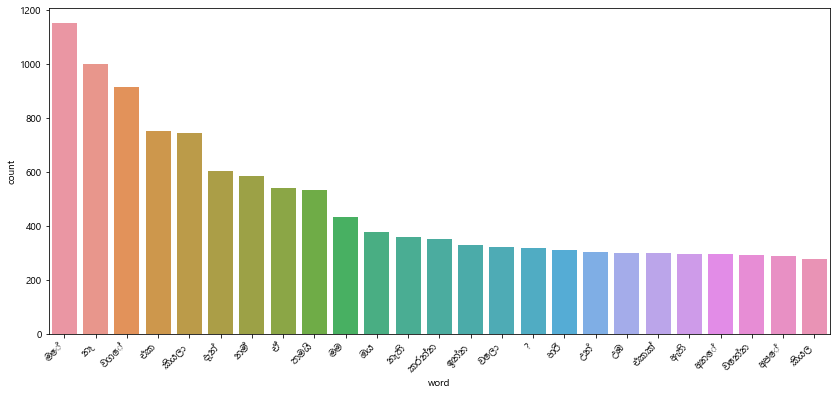

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(df,N=1,n=None):
    vec = CountVectorizer(ngram_range=(N,N) ,analyzer='word',tokenizer=lambda text: text.split()).fit(df)
     
    bag_of_words = vec.transform(df)
    print(vec.get_feature_names()[:30])
    #print(bag_of_words.toarray())
    sum_words = bag_of_words.sum(axis=0)
     
    words_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    #words_freq = list(cv_fit.vocabulary_.items())
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
     
    return words_freq[:n]
 
common_words = get_top_ngrams(df['cleaned'],1,25)
 
df_ngram = pd.DataFrame(common_words,columns=['word','count'])
df_ngram = df_ngram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()
 
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x = 'word',y='count',data=df_ngram,ci = None, ax=ax)
 
ax.set_xticklabels(labels=df_ngram['word'], rotation=45, ha='right')
plt.show()

Is there a possible ways to split hash tags words in sinhla ?

In [168]:
# Try word splitter for hashtags
test_list = ['#+චණ්ඩි', '#අපිහැමෝමසැපේඉන්නෙතිතටමත', '#ආතල්මල්ලි', '#ජොබ්එකගාවගමු', '#තනියමකියවයි', '#දැකලා_හිතුණා', '#දැවෙනප්\u200dරශ්න', '#දෙකටනැවිලාතියාගනිංපුකටපුක', '#නොදකිං', '#පට්ටෟත්ති', '#පුකපෙන්නීම', '#බොබී', '#මගේනම්මගේ', '#මාතර_අහස_උඩ', '#මුංඔක්කොමහිතංඉන්නේමතටතිත', '#මේවාසිරාසිද්ධි', '#යි', '#රටේනීතියගැනආඩම්බරයි', '#රෑනවයටසිත්ගත්ගී', '#රෙද්ද']
for word in test_list:
    results = word_splitter.split(word)
    print(results)

{'debug': [['#', '+චණ්ඩි', 1.9970457902511078], ['#+', 'චණ්ඩි', 1.75], ['#+ච', 'ණ්ඩි', 1.972972972972973], ['#+චණ', '්ඩි', 1.9943661971830986], ['#+චණ්', 'ඩි', 1.9986807387862797], ['#+චණ්ඩ', 'ි', 1.9999835388236844]], 'base': '#+චණ්ඩ', 'affix': 'ි'}
{'debug': [['#', 'අපිහැමෝමසැපේඉන්නෙතිතටමත', 1.9970457902511078], ['#අ', 'පිහැමෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අප', 'ිහැමෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අපි', 'හැමෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අපිහ', 'ැමෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැ', 'මෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැම', 'ෝමසැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝ', 'මසැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝම', 'සැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝමස', 'ැපේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැ', 'පේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැප', 'ේඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේ', 'ඉන්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේඉ', 'න්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේඉන', '්නෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේඉන්', 'නෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේඉන්න', 'ෙතිතටමත', 1.0], ['#අපිහැමෝමසැපේඉන්නෙ', 'තිතටමත', 1.0], ['#අපිහැමෝමසැපේඉන්නෙත

## Bigram

C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
['! අනිත්', '! අපේ', '! අමාමහ', '! අහක', '! ආතල්ම', '! ඇස්', '! උදව්', '! උඹ', '! උවමනාව', '! ජනාධිප', '! ජනාධිපති', '! නාලක', '! නියමයි', '! පොඩි', '! පොන්න', '! මෙම', '! යකෝ', '! රනිල්', '! රාජපක්ෂ', '! රැල්ලට!!!', '! රෙද්ද', '! වර්ධරාජා', '! සිරී', '! —', '!! එදත්', '!! ඒකයි', '!! පෙජ්', '!!! ගෙරි', '!!! මුසල්මානු', '!!!! (ඔබ']


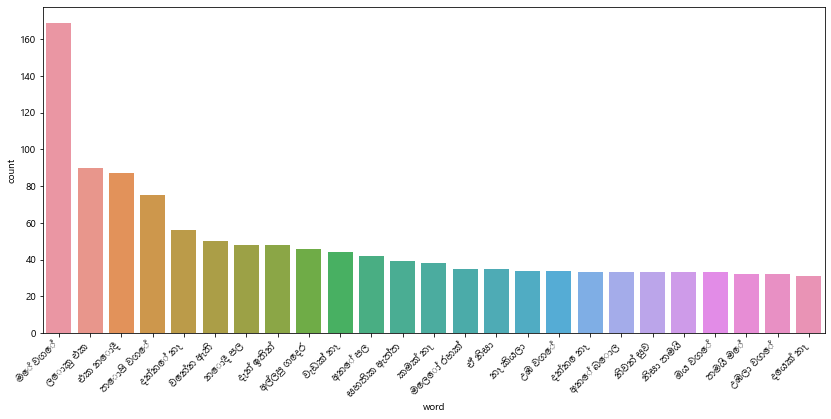

In [40]:

common_words = get_top_ngrams(df['cleaned'],2,25)
 
df_bigram = pd.DataFrame(common_words,columns=['word','count'])
df_bigram = df_bigram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()
df_bigram.head(n=20)

 
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x = 'word',y='count',data=df_bigram,ci = None, ax=ax)
 
ax.set_xticklabels(labels=df_bigram['word'], rotation=45, ha='right')
plt.show()

## Trigram

C:\Users\Kavishka\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
['! අනිත් නීතිත්', '! අපේ මේ', '! අමාමහ නිවන', '! අහක ඉන්න', '! ආතල්ම ලැබේවා', '! ඇස් බී', '! උදව් උපකාර', '! උඹ බෑ', '! උවමනාව තියෙන', '! ජනාධිපති මාධ්\u200dය', '! නාලක බණ්ඩාර', '! නියමයි ඒ', '! පොඩි ගතියක්', '! පොන්න රනිලෝ', '! මෙම අපරාදය', '! යකෝ මේ', '! රාජපක්ෂ හොරුන්ට', '! වර්ධරාජා පෙරැමල්', '! — පොන්න', '!! එදත් පිස්සු', '!! ඒකයි ඇහුවේ', '!! පෙජ් එකට', '!!! ගෙරි මරක්කලයන්ට', '!!! මුසල්මානු පල්ලි', '!!!! (ඔබ විශ්වාසකල', '!!!! (වන් සිරි', '#අපිහැමෝමසැපේඉන්නෙතිතටමත #දෙකටනැවිලාතියාගනිංපුකටපුක හූ', '#ආතල්මල්ලි මොකක් පදනම්', '#ජොබ්එකගාවගමු කියලා හිතලා', '#දෙකටනැවිලාතියාගනිංපුකටපුක හූ හුත්තො']


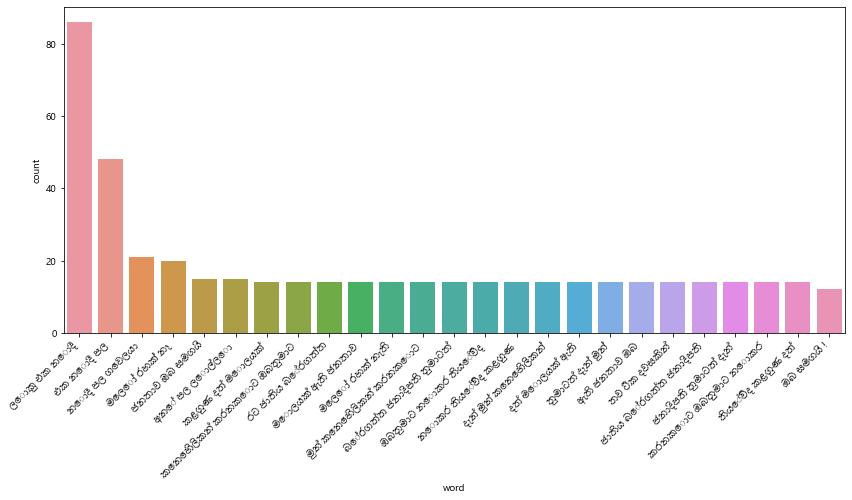

In [41]:
common_words = get_top_ngrams(df['cleaned'],3,25)
 
df_trigram = pd.DataFrame(common_words,columns=['word','count'])
df_trigram = df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()
df_trigram.head(n=20)

fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x = 'word',y='count',data=df_trigram,ci = None, ax=ax)
 
ax.set_xticklabels(labels=df_trigram['word'], rotation=45, ha='right')
plt.show()

##  Eperiment with Singling tool
https://sinling.ysenarath.com/

In [167]:
#pip install sinling

In [31]:
from sinling import SinhalaStemmer

stemmer = SinhalaStemmer()

word = '...'  # your sentence
for i in range(20):
    print(df['comment'][i])
    stem_sent =stemmer.stem(df['comment'][i])
    print(stem_sent)

මේ වේසිට නීතිය ක්‍රියාත්මක වෙන්නෙ කවදාද ?
('මේ වේසිට නීතිය ක්\u200dරියාත්මක වෙන්නෙ කවදාද ?', '')
තූ ෙනදකින්
('තූ ෙනද', 'කින්')
අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්‍රය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට​.
('අම්මා ලුසීඩා කියුවම මට හිතෙන්නම ෆලූඩා කියලා. හිකිස්. ඔව් ඔව් තරුණ වයසේ ගෑණු ළමයි විවිඪ රට වලින් ආශ්\u200dරය කලාට කමක් නෑ. ලෙඩක් කාරියේ හදා ගත්තම තේරෙයි අප්පගේ ආදර බර පුතාට\u200b.', '')
දින ඒකාබද්ධ විපක්ෂයේ මාධ්‍ය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්‍ය සාකච්ඡාව..…
('දින ඒකාබද්ධ විපක්ෂයේ මාධ්\u200dය ලේකම් රේණුක පෙරේරා මහතාගේ නිවේදනයට අදාාලව අමිත් වීරසිංහ කල මාධ්\u200dය සාකච්ඡාව..…', '')
පූදින්ෙන නැතුව ඉදිං
('පූදින්ෙන නැතුව ඉදිං', '')
ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් දෙකයි එයාට තියෙන්නේ කියලා. එතකොට අප්පටයි
('ඇමති පඩිය ඇතිද කියල අහුවම මේකි කියන්නේ වාහන් දෙකයි එයාට තියෙන්නේ කියලා. එතකොට අප්පට', 'යි')
මා හෝ ඒකාබද්ධ විපක්ෂය මගින් හෝ දැනට පවතින කිසිම පක්ෂයකින් ඡ

In [44]:
from sinling import SinhalaTokenizer, POSTagger

tokenizer = SinhalaTokenizer()

#document = df[0].values  # may contain multiple sentences

tokenized_sentences = [tokenizer.tokenize(f'{ss}.') for ss in df['cleaned']]
print(tokenized_sentences)

tagger = POSTagger()

pos_tags = tagger.predict(tokenized_sentences)
print(pos_tags)

න්ජා', 'NNP'), ('දැන්', 'RB'), ('පෙම්වතාගෙ', 'NNC'), ('චරිතයට', 'NNC'), ('නාකි', 'JJ'), ('වැඩියි', 'NNC'), ('නිකං', 'NNP'), ('ජෝකර්', 'NNP'), ('ටයිප්', 'NNP'), ('එකක්', 'NNC'), ('එලියට', 'NNC'), ('එන්නෙ', 'VP'), ('ඒ', 'DET'), ('දර්ශන', 'NNC'), ('වල', 'CM'), ('.', 'FS')], [('මේ', 'DET'), ('වගේ', 'POST'), ('තැනක', 'NNC'), ('දාන', 'VP'), ('නමකින්', 'JJ'), ('කෙනෙකුගේ', 'NNC'), ('හැදියාව', 'NNC'), ('හොයන', 'VP'), ('උඹ', 'PRP'), ('නම්', 'POST'), ('උපන්', 'VP'), ('ගෙයි', 'NNC'), ('හරකෙක්', 'NNC'), ('බං', 'JJ'), ('අඩු', 'JJ'), ('ගානෙ', 'NNC'), ('රෙදි', 'JJ'), ('ඉස්කෝලෙටවත්', 'NNC'), ('ගියෙ', 'VP'), ('නැද්ද', 'NIP'), ('පොඩි', 'JJ'), ('කාලෙ', 'NNC'), ('?', 'PUNC'), ('.', 'FS')], [('අපේ', 'PRP'), ('අම්මා', 'NNC'), ('ඉස්සර', 'NNC'), ('මට', 'PRP'), ('බූවලු', 'NNC'), ('හනසු', 'JJ'), ('කැඩෙනකං', 'JJ'), ('ගගහා', 'NNC'), ('ගේ', 'CM'), ('වටේ', 'NNC'), ('එලවන්නෙ', 'VP'), ('එහෙම', 'RB'), ('හැදුව', 'NNC'), ('නිසා', 'POST'), ('තමයි', 'POST'), ('අද', 'NNC'), ('හිරේ', 'NNC'), ('විලංගුවෙ', 'NNC'), ('නොවැටී', '

In [120]:
print(tokenized_sentences[:10])

[['මේ', 'වේසිට', 'නීතිය', 'ක්\u200dරියාත්මක', 'වෙන්නෙ', 'කවදාද', '?', '.'], ['තූ', 'ෙනදකින්', '.'], ['අම්මා', 'ලුසීඩා', 'කියුවම', 'මට', 'හිතෙන්නම', 'ෆලූඩා', 'කියලා', 'හිකිස්', 'ඔව්', 'ඔව්', 'තරුණ', 'වයසේ', 'ගෑණු', 'ළමයි', 'විවිඪ', 'රට', 'වලින්', 'ආශ්\u200dරය', 'කලාට', 'කමක්', 'නෑ', 'ලෙඩක්', 'කාරියේ', 'හදා', 'ගත්තම', 'තේරෙයි', 'අප්පගේ', 'ආදර', 'බර', 'පුතාට', '.'], ['දින', 'ඒකාබද්ධ', 'විපක්ෂයේ', 'මාධ්\u200dය', 'ලේකම්', 'රේණුක', 'පෙරේරා', 'මහතාගේ', 'නිවේදනයට', 'අදාාලව', 'අමිත්', 'වීරසිංහ', 'කල', 'මාධ්\u200dය', 'සාකච්ඡාව', '.'], ['පූදින්ෙන', 'නැතුව', 'ඉදිං', '.'], ['ඇමති', 'පඩිය', 'ඇතිද', 'කියල', 'අහුවම', 'මේකි', 'කියන්නේ', 'වාහන්', 'දෙකයි', 'එයාට', 'තියෙන්නේ', 'කියලා', 'එතකොට', 'අප්පටයි', '.'], ['මා', 'හෝ', 'ඒකාබද්ධ', 'විපක්ෂය', 'මගින්', 'හෝ', 'දැනට', 'පවතින', 'කිසිම', 'පක්ෂයකින්', 'ඡන්දයකට', 'ඉදිරිපත්', 'වෙනවා', 'කියා', 'නැ', 'ඒකාබද්ධ', 'විපක්ෂය', 'වැනි', 'වි', '.'], ['උඹ', 'එක්ක', 'එකඟවෙන්න', 'පුලුවන්', 'කථාවක්', 'තමයි', 'අද', 'බොලා', 'කියලා', 'තියෙන්නෙ', 'මුන්ගෙ', 'සනුහරේම', 'උපන්', 'ග

In [50]:
# def pos(text):
#     #pos=nltk.pos_tag(word_tokenize(text))
#     tokenized_sentences = tokenizer.tokenize(text)
#     tagger = POSTagger()

#     pos_tags = tagger.predict(tokenized_sentences)
#     pos=list(map(list,zip(*pos_tags)))[1]
#     return pos

# tags=df['cleaned'].apply(lambda x : pos(x))
# tags=[x for l in tags for x in l]
# counter=Counter(tags)
# print(counter)
# x,y=list(map(list,zip(*counter.most_common(7))))
# print(x,y)
# sns.barplot(x=y,y=x)
# plt.show()

In [39]:
# Morphological splitter
from sinling import word_splitter
word_list = ['නිවේදනයට', 'විපක්ෂයේ', 'මහතාගේ','කොල්ලට']
for word in word_list:
    results = word_splitter.split(word)
    print(results)
# performence is good eventhough it takes time

{'debug': [['න්', 'ිවේදනයට', 11.989672977624785], ['නි', 'වේදනයට', 23.933471933471935], ['නිව්', 'ේදනයට', 45.08239375542064], ['නිවේ', 'දනයට', 40.14035087719298], ['නිවේද', 'නයට', 1.9987797437461867], ['නිවේදන', 'යට', 2286.002876121345], ['නිවේදනය', 'ට', 6513.579737836037]], 'base': 'නිවේදනය', 'affix': 'ට'}
{'debug': [['ව', 'ිපක්ෂයේ', 35.9771291426958], ['වි', 'පක්ෂයේ', 65.71125546864643], ['විප්', 'ක්ෂයේ', 7.522388059701493], ['විපක', '්ෂයේ', 5.804347826086957], ['විපක්', 'ෂයේ', 3.9555555555555557], ['විපක්ෂ', 'යේ', 7626.140820808751], ['විපක්ෂය', 'ේ', 6393.3424480408685]], 'base': 'විපක්ෂ', 'affix': 'යේ'}
{'debug': [['ම', 'හතාගේ', 37.99272243445655], ['මහ', 'තාගේ', 452.2694161307115], ['මහත්', 'ාගේ', 8378.335909519321], ['මහතා', 'ගේ', 55560.3355925903], ['මහතාග්', 'ේ', 13.99892363284897]], 'base': 'මහතා', 'affix': 'ගේ'}
{'debug': [['ක්', 'ොල්ලට', 53.988438206256696], ['කො', 'ල්ලට', 703.2728119180633], ['කොල', '්ලට', 329.3641900121803], ['කොල්', 'ලට', 39.90191270230505], ['කොල්ල', 'ට'